In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Do a descriptive analysis of all the variables.

In [5]:
#reading data
data=pd.read_csv("trainingData .csv")
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [7]:
data['sex'].unique()

array(['F', 'M', 'TG'], dtype=object)

In [8]:
data.shape

(40000, 21)

In [9]:
data.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount'], dtype='object')

In [10]:
#Calculating missing value
data.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [11]:
#Calculating missing value in percentage
(data.isnull().sum()/40000)*100

Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [13]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


from matplotlib import pyplot as plt
_df_0['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['annual_income'].plot(kind='hist', bins=20, title='annual_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['monthly_expenses'].plot(kind='hist', bins=20, title='monthly_expenses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='annual_income', y='monthly_expenses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='monthly_expenses', y='old_dependents', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['monthly_expenses'].plot(kind='line', figsize=(8, 4), title='monthly_expenses')
plt.gca().spines[['top', 'right']].set_visible(False)

# Correlation Matrix


In [14]:
correlation=data.corr()
correlation.head()

<ipython-input-14-25814181ce5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,-0.004114,0.472447,-0.021413,0.044053,0.109523,0.095202,0.007440,0.037266,0.003357,0.433107,-0.062596,-0.225166,0.141249
age,-0.004114,1.000000,-0.006414,-0.003101,-0.000691,-0.005837,0.000937,-0.000031,-0.000586,-0.007487,-0.001627,-0.000233,-0.003040,-0.001969
annual_income,0.472447,-0.006414,1.000000,0.112499,0.062216,0.239864,0.011885,0.003999,0.033902,0.241509,0.280939,-0.027618,-0.119936,0.085632
monthly_expenses,-0.021413,-0.003101,0.112499,1.000000,-0.003522,0.028754,-0.047173,0.001320,-0.008270,0.059819,0.078061,-0.013020,0.113914,0.019569
old_dependents,0.044053,-0.000691,0.062216,-0.003522,1.000000,-0.093778,0.008586,-0.000987,0.010852,0.029027,-0.017931,-0.022390,-0.033921,0.006997


<ipython-input-19-d27a350ef3be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


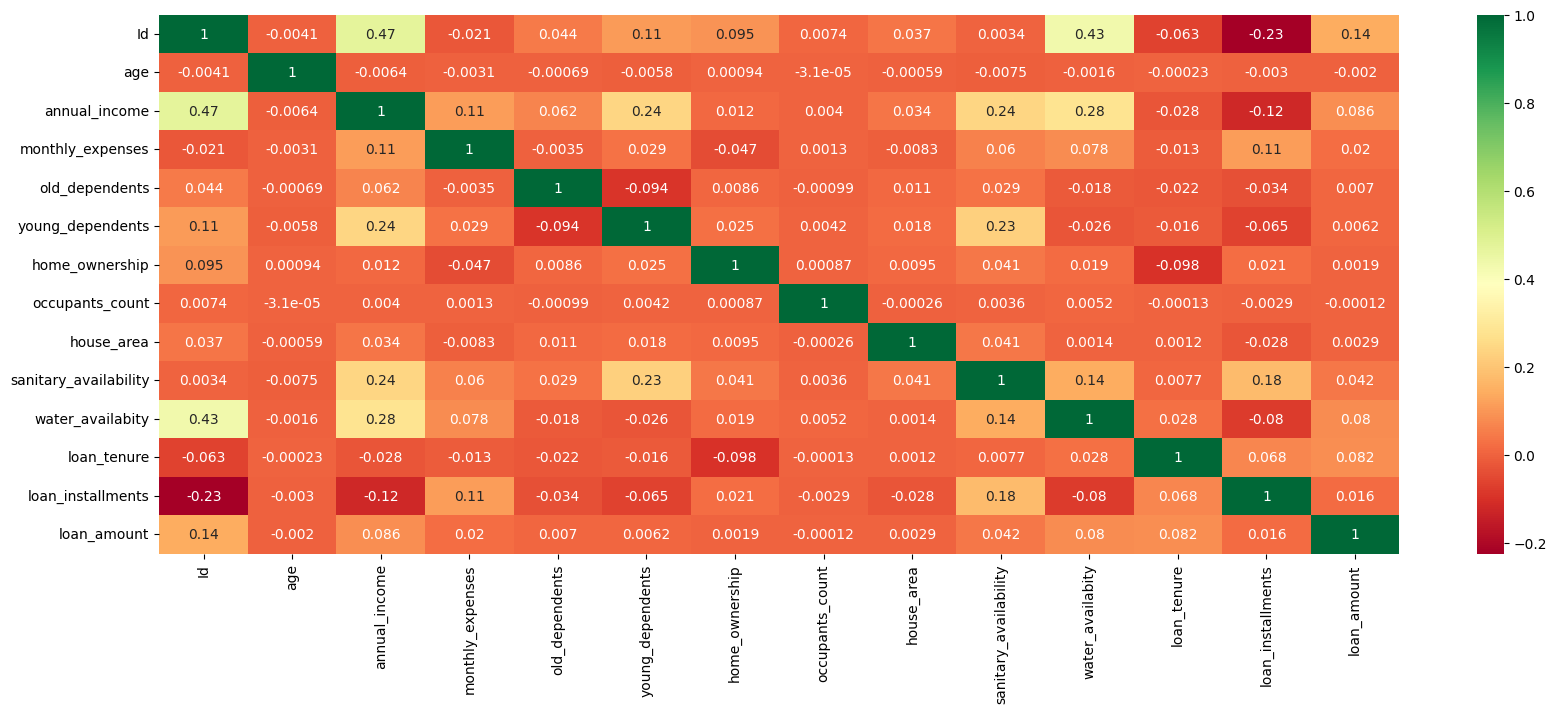

In [19]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,7))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Exploratory Data Analysis

#  1.Personal Details: city, age, sex, social_class

In [23]:
# Personal Details: city, age, sex, social_class
#personal_data=pd.DataFrame(data,columns={"city","age","sex","social_class"})
columns = ["city", "age", "sex", "social_class"]
personal_data = pd.DataFrame(data, columns=list(columns))
personal_data.head()

,city,age,sex,social_class
0,Dhanbad,22,F,Mochi
1,Manjapra,21,F,OBC
2,Dhanbad,24,M,Nai
3,NaN,26,F,OBC
4,Nuapada,23,F,OBC


In [24]:
personal_data.describe()

,age
count,40000.00000
mean,55.15990
std,3830.35566
min,2.00000
25%,29.00000
50%,35.00000
75%,42.00000
max,766105.00000


In [25]:
personal_data.isnull().sum()

city            1864
age                0
sex                0
social_class    5255
dtype: int64

In [26]:
personal_data['age'].unique()

array([    22,     21,     24,     26,     23,     28,     38,     25,
           34,     37,     50,     54,     57,     48,     32,     35,
           43,     51,     39,     41,     46,     45,     44,     47,
           40,     42,     33,     53,     30,     29,     36,     19,
           27,     20,     55,     49,     31,     52,     58,     56,
           18,     59,     60,     61,     63,     64,     62,     65,
           67,     70,    205, 766105,     74,      2,    288,     69,
           66,     72,     68,     82,     88,     75])

<Axes: >

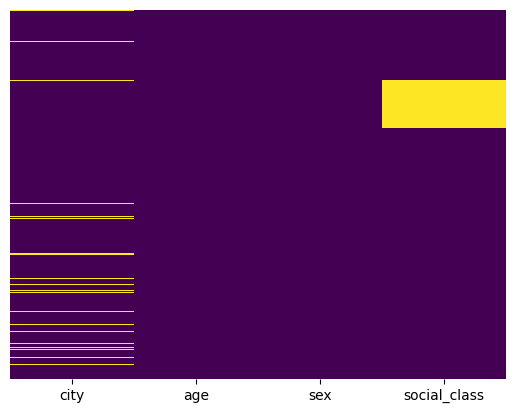

In [27]:
sns.heatmap(personal_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
personal_data.count()

city            38136
age             40000
sex             40000
social_class    34745
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

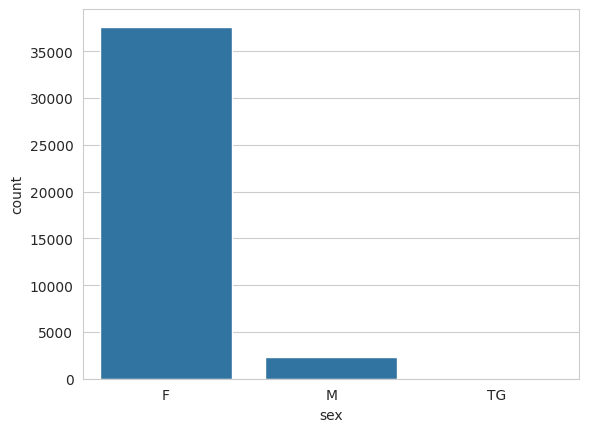

In [29]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='sex',data=personal_data)

In [30]:
data1=personal_data[(personal_data['sex']=="M")].count()
data1.head()

city            2193
age             2371
sex             2371
social_class    2278
dtype: int64

In [31]:
data1=personal_data[(personal_data['sex']=="F")].count()
data1.head()

city            35938
age             37622
sex             37622
social_class    32460
dtype: int64

In [32]:
data1=personal_data[(personal_data['sex']=="TG")].count()
data1.head()

city            5
age             7
sex             7
social_class    7
dtype: int64

# 2. Financial Details

In [34]:
#Financial Details: primary_business, secondary_business, annual_income, monthly_expenses,
#old_dependents, young_dependents
#financial_details_data=pd.DataFrame(data,columns={"primary_business","secondary_business","annual_income","monthly_expenses",
                                                # "old_dependents","young_dependents"})
#Financial Details: primary_business, secondary_business, annual_income, monthly_expenses,
#old_dependents, young_dependents
financial_details_data=pd.DataFrame(data,columns=list({"primary_business","secondary_business","annual_income","monthly_expenses",
                                                 "old_dependents","young_dependents"}))

financial_details_data.head()

,old_dependents,monthly_expenses,young_dependents,annual_income,secondary_business,primary_business
0,0,5000.0,2,36000.0,Others,Tailoring
1,1,3600.0,1,94000.0,none,Tailoring
2,0,4000.0,2,48000.0,Others,Beauty salon
3,0,5000.0,2,7000.0,none,Tailoring
4,0,3500.0,0,36000.0,Agriculture,General store


In [35]:
financial_details_data.describe()

,old_dependents,monthly_expenses,young_dependents,annual_income
count,40000.000000,39880.000000,40000.00000,4.000000e+04
mean,0.044900,3810.875401,1.13710,3.764021e+04
std,0.222003,4592.958009,1.07384,2.873912e+04
min,0.000000,2.000000,0.00000,0.000000e+00
25%,0.000000,2500.000000,0.00000,1.440000e+04
50%,0.000000,3500.000000,1.00000,3.600000e+04
75%,0.000000,4000.000000,2.00000,5.600000e+04
max,3.000000,240000.000000,7.00000,1.200000e+06


In [36]:
financial_details_data.isnull().sum()

old_dependents           0
monthly_expenses       120
young_dependents         0
annual_income            0
secondary_business    5241
primary_business        26
dtype: int64

<Axes: >

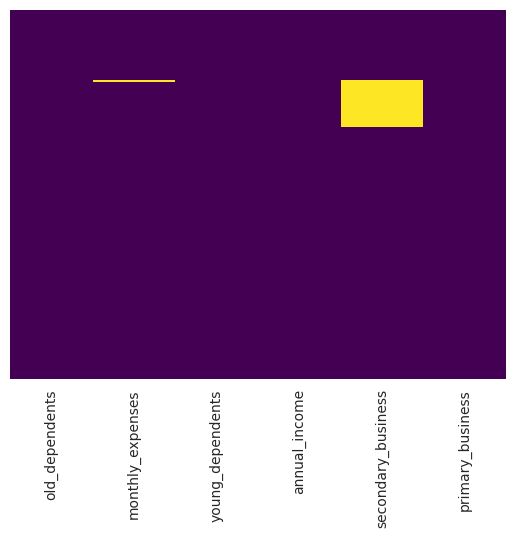

In [37]:
sns.heatmap(financial_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
financial_details_data.count()

old_dependents        40000
monthly_expenses      39880
young_dependents      40000
annual_income         40000
secondary_business    34759
primary_business      39974
dtype: int64

<Axes: xlabel='secondary_business', ylabel='count'>

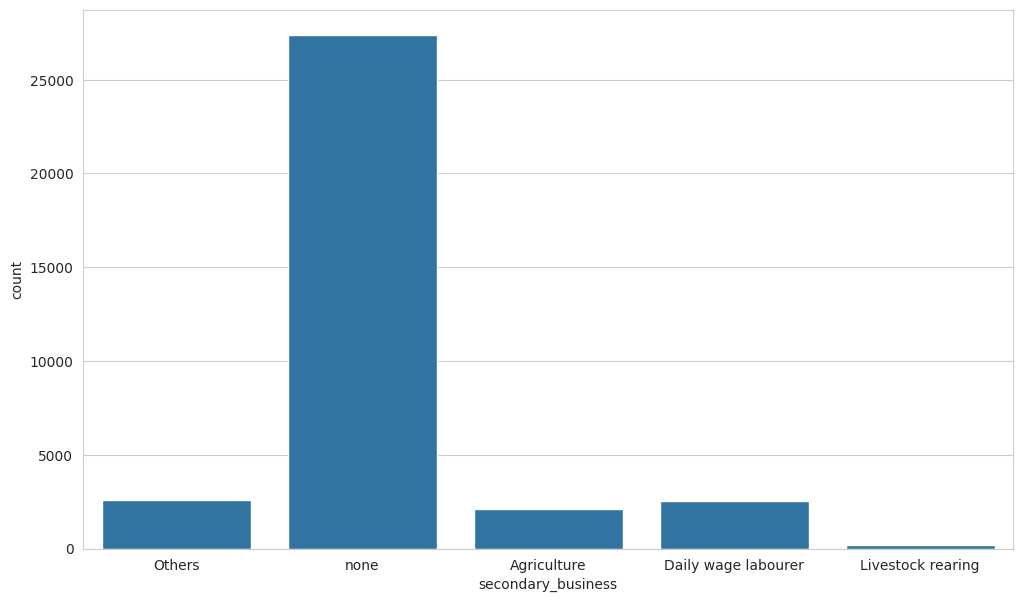

In [42]:
#categorical features
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.countplot(x='secondary_business',data=financial_details_data)

# 3.House Details

In [45]:
#House Details: home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,
#water_availability
house_details_data=pd.DataFrame(data,columns=list({"home_ownership","type_of_house","occupants_count",
                                             "house_area","sanitary_availability","water_availability"}))

house_details_data.tail()

,home_ownership,occupants_count,water_availability,house_area,sanitary_availability,type_of_house
39995,1.0,2,NaN,600.0,1.0,T2
39996,1.0,4,NaN,800.0,1.0,T2
39997,1.0,3,NaN,600.0,1.0,T2
39998,1.0,4,NaN,600.0,1.0,T2
39999,1.0,4,NaN,600.0,1.0,T2


In [46]:
house_details_data.describe()

,home_ownership,occupants_count,water_availability,house_area,sanitary_availability
count,39621.000000,40000.000000,0.0,40000.000000,39792.000000
mean,0.972489,26.641000,NaN,552.804750,0.686369
std,0.163568,4749.995485,NaN,4596.921905,0.464028
min,0.000000,0.000000,NaN,0.000000,-1.000000
25%,1.000000,2.000000,NaN,200.000000,0.000000
50%,1.000000,3.000000,NaN,400.000000,1.000000
75%,1.000000,4.000000,NaN,600.000000,1.000000
max,1.000000,950000.000000,NaN,700000.000000,1.000000


In [47]:
house_details_data.isnull().sum()

home_ownership             379
occupants_count              0
water_availability       40000
house_area                   0
sanitary_availability      208
type_of_house              694
dtype: int64

<Axes: >

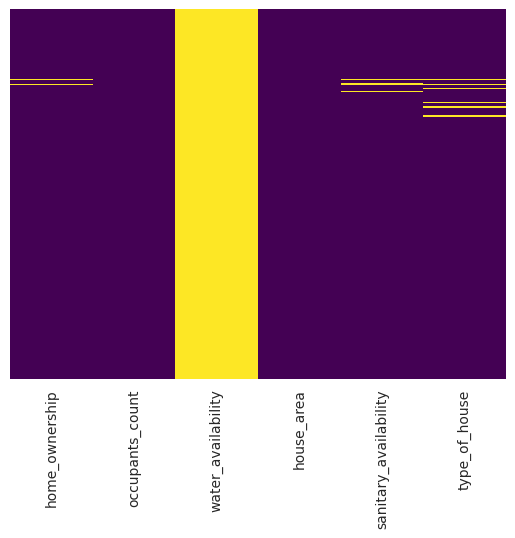

In [48]:
sns.heatmap(house_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
house_details_data.count()

home_ownership           39621
occupants_count          40000
water_availability           0
house_area               40000
sanitary_availability    39792
type_of_house            39306
dtype: int64

<Axes: xlabel='sanitary_availability', ylabel='count'>

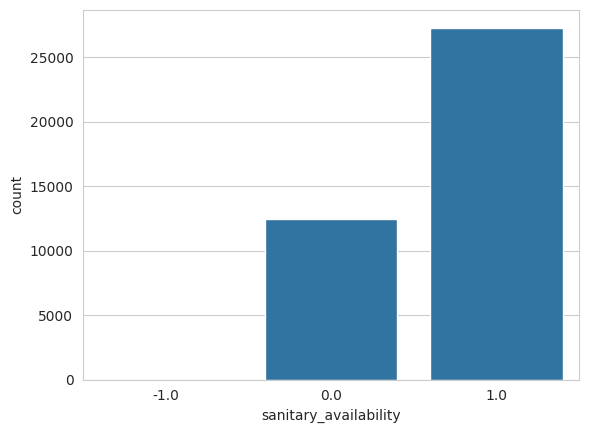

In [50]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='sanitary_availability',data=house_details_data)

# 4.Loan Details:

In [52]:
#Loan Details: loan_purpose, loan_tenure, loan_installments, loan_amount
#(these contain loan details of loans that have been previously given, and which have been repaid)
loan_details_data=pd.DataFrame(data,columns=list({"loan_purpose","loan_tenure","loan_installments","loan_amount"}))

loan_details_data.head()

,loan_purpose,loan_amount,loan_installments,loan_tenure
0,Apparels,5000.0,12,12
1,Apparels,7500.0,50,12
2,Beauty Salon,5000.0,12,12
3,Apparels,7500.0,50,12
4,Retail Store,5000.0,12,12


In [53]:
loan_details_data.describe()

,loan_amount,loan_installments,loan_tenure
count,4.000000e+04,40000.000000,40000.000000
mean,8.412593e+03,21.761175,12.032225
std,1.359694e+04,16.682458,1.367473
min,1.000000e+02,0.000000,3.000000
25%,5.000000e+03,12.000000,12.000000
50%,8.000000e+03,12.000000,12.000000
75%,1.000000e+04,50.000000,12.000000
max,1.343000e+06,84.000000,84.000000


In [54]:
loan_details_data.isnull().sum()

loan_purpose         26
loan_amount           0
loan_installments     0
loan_tenure           0
dtype: int64

<Axes: >

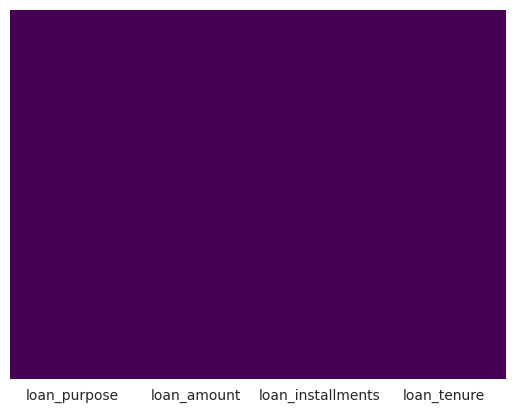

In [55]:
sns.heatmap(loan_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
loan_details_data.count()

loan_purpose         39974
loan_amount          40000
loan_installments    40000
loan_tenure          40000
dtype: int64

# 2.There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?

Ans: This is a regression problem.Regression models will be best suited to predict the loan_amount that can be granted to the customer.I have used linear regression ,decision tree and Random forest algorithm.

# 3. Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?

Ans: Good predictors variables are:
* age
* sex
* primary_business
* secondary_business
* annual_income
* monthly_expenses
* old_dependents
* young_dependents
* home_ownership
* type_of_house
* occupants_count
* house_area
* loan_purpose
* loan_tenure
* loan_installments


# Handling Missing value

In [59]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [60]:

#Since in age features ,we have one record of 205,288 and 766105
#these are some kind of outliers and 788105 are mistyped age value.
#I am dropping these values as we have only 3 records.
data_outlier1=data.loc[data['age']==205]
data_outlier2=data.loc[data['age']==288]
data_outlier3=data.loc[data['age']==766105]

In [61]:
i = data[(data.age ==205)].index
j=data[(data.age==288)].index
k=data[(data.age==766105)].index

In [62]:
#deleting three records
data_updated1=data.drop(i)
data_updated2=data.drop(j)
data_updated2=data.drop(k)

In [63]:
data_updated2.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [64]:
data_updated3=data_updated2.copy()

In [65]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [66]:
#Handling missing values with mean and mode
data_updated3['social_class']=data_updated3['social_class'].fillna(data_updated3['social_class'].mode()[0])
data_updated3['city']=data_updated3['city'].fillna(data_updated3['city'].mode()[0])
data_updated3['primary_business']=data_updated3['primary_business'].fillna(data_updated3['primary_business'].mode()[0])
data_updated3['secondary_business']=data_updated3['secondary_business'].fillna(data_updated3['secondary_business'].mode()[0])
data_updated3['type_of_house']=data_updated3['type_of_house'].fillna(data_updated3['type_of_house'].mode()[0])
data_updated3['sanitary_availability']=data_updated3['sanitary_availability'].fillna(data_updated3['sanitary_availability'].mode()[0])
data_updated3['water_availabity']=data_updated3['water_availabity'].fillna(data_updated3['water_availabity'].mode()[0])
data_updated3['loan_purpose']=data_updated3['loan_purpose'].fillna(data_updated3['loan_purpose'].mode()[0])
data_updated3['monthly_expenses']=data_updated3['monthly_expenses'].fillna(data_updated3['monthly_expenses'].mean())
data_updated3['home_ownership']=data_updated3['home_ownership'].fillna(data_updated3['home_ownership'].mode()[0])

In [67]:
data_updated3.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [68]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [69]:
data_updated3.shape

(39999, 21)

In [ ]:
X=data_updated3.iloc[:, 1:20]
X.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12


In [ ]:
X.shape

(39999, 19)

In [70]:
y=data_updated3.iloc[:,-1]
y.head()

0    5000.0
1    7500.0
2    5000.0
3    7500.0
4    5000.0
Name: loan_amount, dtype: float64

In [72]:
data_X=pd.DataFrame(data_updated3,columns=list({"Id","age","sex","annual_income",
                                     "monthly_expenses","old_dependents","young_dependents","home_ownership","type_of_house",
                                     "occupants_count","house_area","loan_tenure","loan_installments"}))



In [73]:
data_X.head()

,monthly_expenses,loan_installments,sex,type_of_house,home_ownership,age,young_dependents,occupants_count,loan_tenure,Id,annual_income,old_dependents,house_area
0,5000.0,12,F,R,1.0,22,2,4,12,1,36000.0,0,70.0
1,3600.0,50,F,T1,1.0,21,1,4,12,2,94000.0,1,80.0
2,4000.0,12,M,T1,1.0,24,2,4,12,3,48000.0,0,50.0
3,5000.0,50,F,T1,1.0,26,2,5,12,4,7000.0,0,50.0
4,3500.0,12,F,T1,1.0,23,0,1,12,5,36000.0,0,112.0


In [75]:
data1=pd.DataFrame(data_X,columns=list({"type_of_house","sex"}))
data2= pd.get_dummies(data1.type_of_house,prefix='type_of_house',drop_first=True)

In [76]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.sex, prefix='sex',drop_first=True)

In [78]:
data6= pd.concat([data2, data3],axis=1)
data6.head(20)

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,0,0


In [79]:
data7= pd.concat([data_X, data6],axis=1)
data7.head()

,monthly_expenses,loan_installments,sex,type_of_house,home_ownership,age,young_dependents,occupants_count,loan_tenure,Id,annual_income,old_dependents,house_area,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,5000.0,12,F,R,1.0,22,2,4,12,1,36000.0,0,70.0,0,0,0,0
1,3600.0,50,F,T1,1.0,21,1,4,12,2,94000.0,1,80.0,1,0,0,0
2,4000.0,12,M,T1,1.0,24,2,4,12,3,48000.0,0,50.0,1,0,1,0
3,5000.0,50,F,T1,1.0,26,2,5,12,4,7000.0,0,50.0,1,0,0,0
4,3500.0,12,F,T1,1.0,23,0,1,12,5,36000.0,0,112.0,1,0,0,0


In [80]:
X=pd.DataFrame(data7,columns=list({"old_dependents","loan_installments","loan_tenure","home_ownership",
                       "young_dependents","monthly_expenses","annual_income","age","house_area","Id",
                       "occupants_count","type_of_house_T1","type_of_house_T2","sex_M","sex_TG"}))

In [81]:
X.head()

,house_area,monthly_expenses,sex_TG,type_of_house_T1,sex_M,type_of_house_T2,old_dependents,age,young_dependents,occupants_count,loan_tenure,Id,annual_income,loan_installments,home_ownership
0,70.0,5000.0,0,0,0,0,0,22,2,4,12,1,36000.0,12,1.0
1,80.0,3600.0,0,1,0,0,1,21,1,4,12,2,94000.0,50,1.0
2,50.0,4000.0,0,1,1,0,0,24,2,4,12,3,48000.0,12,1.0
3,50.0,5000.0,0,1,0,0,0,26,2,5,12,4,7000.0,50,1.0
4,112.0,3500.0,0,1,0,0,0,23,0,1,12,5,36000.0,12,1.0


In [82]:
X.shape

(39999, 15)

In [83]:
X.isnull().sum()

house_area           0
monthly_expenses     0
sex_TG               0
type_of_house_T1     0
sex_M                0
type_of_house_T2     0
old_dependents       0
age                  0
young_dependents     0
occupants_count      0
loan_tenure          0
Id                   0
annual_income        0
loan_installments    0
home_ownership       0
dtype: int64

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   house_area         39999 non-null  float64
 1   monthly_expenses   39999 non-null  float64
 2   sex_TG             39999 non-null  uint8  
 3   type_of_house_T1   39999 non-null  uint8  
 4   sex_M              39999 non-null  uint8  
 5   type_of_house_T2   39999 non-null  uint8  
 6   old_dependents     39999 non-null  int64  
 7   age                39999 non-null  int64  
 8   young_dependents   39999 non-null  int64  
 9   occupants_count    39999 non-null  int64  
 10  loan_tenure        39999 non-null  int64  
 11  Id                 39999 non-null  int64  
 12  annual_income      39999 non-null  float64
 13  loan_installments  39999 non-null  int64  
 14  home_ownership     39999 non-null  float64
dtypes: float64(4), int64(7), uint8(4)
memory usage: 3.8 MB


In [86]:
y=pd.DataFrame(data_updated3,columns=list({"loan_amount"}))

In [87]:
y.shape

(39999, 1)

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

<ipython-input-88-867276381ad1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesRegressor()

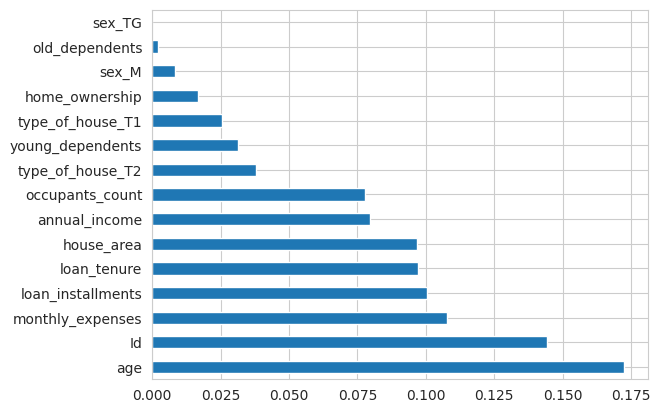

In [89]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Linear Regression

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [93]:

prediction=regressor.predict(X_test)

In [103]:
prediction

array([[6601.25849197],
       [6055.02039239],
       [5941.20332308],
       ...,
       [8233.44057231],
       [8073.65833289],
       [7218.7119977 ]])

In [94]:
data_prediction=pd.DataFrame(prediction,columns=list({"Predicted_loan_amount"}))
data_prediction.head()

,Predicted_loan_amount
0,6601.258492
1,6055.020392
2,5941.203323
3,5687.549364
4,9737.819776


In [95]:
data_prediction.shape

(12000, 1)

In [96]:
y_test.shape

(12000, 1)

In [97]:
y_test.head()

,loan_amount
12837,5000.0
10914,3000.0
4214,5000.0
8198,2000.0
29127,10000.0


In [99]:
y_test1=y_test.copy()

In [100]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns=list({"loan_amount"}))
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [101]:
df_row_merged = pd.concat([data_prediction,y_test2],axis=1)
df_row_merged.head(10)

,Predicted_loan_amount,loan_amount
0,6601.258492,5000.0
1,6055.020392,3000.0
2,5941.203323,5000.0
3,5687.549364,2000.0
4,9737.819776,10000.0
5,6801.569466,5000.0
6,10726.570871,15000.0
7,6259.577866,7500.0
8,9554.410648,12000.0
9,11046.660947,8000.0


<Axes: >

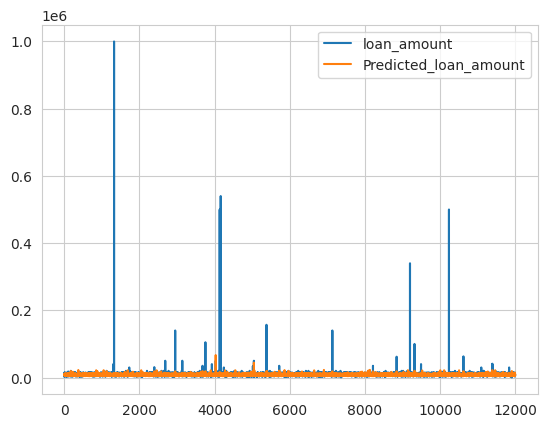

In [102]:
df_row_merged[['loan_amount','Predicted_loan_amount']].plot()

In [104]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2282.450493962068
MSE: 166992843.86178735
RMSE: 12922.571101053665


In [105]:
#df_row_merged_randomforest.head()
df_row_merged['error_rate']=(abs(df_row_merged['loan_amount']-df_row_merged['Predicted_loan_amount'])/df_row_merged['loan_amount'])*100

In [106]:
df_row_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,6601.258492,5000.0,32.025170
1,6055.020392,3000.0,101.834013
2,5941.203323,5000.0,18.824066
3,5687.549364,2000.0,184.377468
4,9737.819776,10000.0,2.621802


from matplotlib import pyplot as plt
_df_12['Predicted_loan_amount'].plot(kind='hist', bins=20, title='Predicted_loan_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['loan_amount'].plot(kind='hist', bins=20, title='loan_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['error_rate'].plot(kind='hist', bins=20, title='error_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Predicted_loan_amount', y='loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='loan_amount', y='error_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Predicted_loan_amount'].plot(kind='line', figsize=(8, 4), title='Predicted_loan_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['loan_amount'].plot(kind='line', figsize=(8, 4), title='loan_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['error_rate'].plot(kind='line', figsize=(8, 4), title='error_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [107]:
#mean error rate
linear_mean_error=df_row_merged.error_rate.mean()
#calculating accuracy
mean_accuracy=100-linear_mean_error
mean_accuracy

71.71681090049717

# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dtree=DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [111]:
dtreePrediction=dtree.predict(X_test)

In [113]:
dtreePrediction_data=pd.DataFrame(dtreePrediction,columns=list({"Predicted_loan_amount"}))
dtreePrediction_data.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3000.0
4,10000.0


In [114]:
df_row_merged_dtree = pd.concat([dtreePrediction_data,y_test2],axis=1)
df_row_merged_dtree.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3000.0,2000.0
4,10000.0,10000.0
5,5000.0,5000.0
6,8000.0,15000.0
7,7500.0,7500.0
8,12000.0,12000.0
9,8000.0,8000.0


<Axes: >

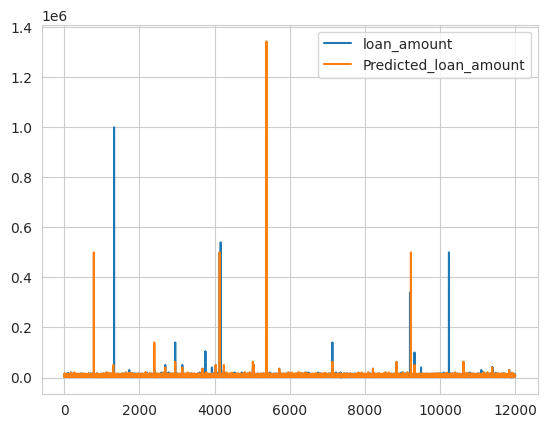

In [115]:
df_row_merged_dtree[['loan_amount','Predicted_loan_amount']].plot()

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, dtreePrediction))
print('MSE:', metrics.mean_squared_error(y_test, dtreePrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtreePrediction)))

MAE: 1451.7583333333334
MSE: 300673330.8333333
RMSE: 17339.934568311764


In [117]:
#df_row_merged_randomforest.head()
df_row_merged_dtree['error_rate']=(abs(df_row_merged_dtree['loan_amount']-df_row_merged_dtree['Predicted_loan_amount'])/df_row_merged_dtree['loan_amount'])*100

In [118]:
df_row_merged_dtree.head(20)

,Predicted_loan_amount,loan_amount,error_rate
0,5000.0,5000.0,0.000000
1,3000.0,3000.0,0.000000
2,5000.0,5000.0,0.000000
3,3000.0,2000.0,50.000000
4,10000.0,10000.0,0.000000
5,5000.0,5000.0,0.000000
6,8000.0,15000.0,46.666667
7,7500.0,7500.0,0.000000
8,12000.0,12000.0,0.000000
9,8000.0,8000.0,0.000000


In [119]:
#mean error rate
dt_mean_error=df_row_merged_dtree.error_rate.mean()
#calculating accuracy
dt_mean_accuracy=100-dt_mean_error
dt_mean_accuracy

85.78682463557527

# RandomForest

In [120]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)

<ipython-input-120-3f0ec56ae3f6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train,y_train)


RandomForestRegressor()

In [121]:
randomforest_prediction=randomforest.predict(X_test)

In [123]:
randomforest_prediction_data=pd.DataFrame(randomforest_prediction,columns=list({"Predicted_loan_amount"}))
randomforest_prediction_data.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5005.0
3,3600.0
4,10110.0


In [124]:
df_row_merged_randomforest = pd.concat([randomforest_prediction_data,y_test2],axis=1)
df_row_merged_randomforest.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5005.0,5000.0
3,3600.0,2000.0
4,10110.0,10000.0
5,6275.0,5000.0
6,11370.0,15000.0
7,5600.0,7500.0
8,10783.0,12000.0
9,8047.0,8000.0


<Axes: >

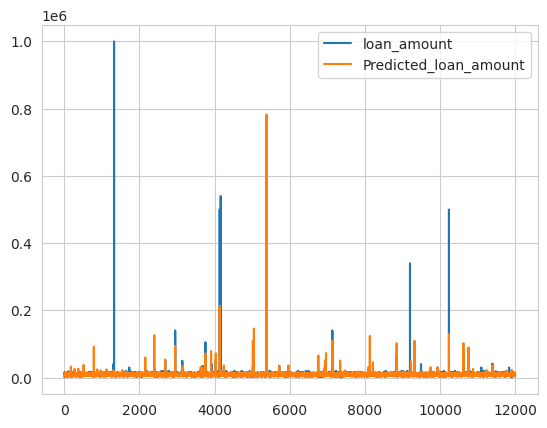

In [125]:
df_row_merged_randomforest[['loan_amount','Predicted_loan_amount']].plot()

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, randomforest_prediction))
print('MSE:', metrics.mean_squared_error(y_test, randomforest_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, randomforest_prediction)))

MAE: 1324.6859166666666
MSE: 173112654.55991668
RMSE: 13157.228224816832


# Error rate

* (abs(actualvalue-predictedvalue)/actualvalue)*100

In [127]:
#df_row_merged_randomforest.head()
df_row_merged_randomforest['error_rate']=(abs(df_row_merged_randomforest['loan_amount']-df_row_merged_randomforest['Predicted_loan_amount'])/df_row_merged_randomforest['loan_amount'])*100

In [128]:
df_row_merged_randomforest.head(20)

,Predicted_loan_amount,loan_amount,error_rate
0,5000.0,5000.0,0.000000
1,3000.0,3000.0,0.000000
2,5005.0,5000.0,0.100000
3,3600.0,2000.0,80.000000
4,10110.0,10000.0,1.100000
5,6275.0,5000.0,25.500000
6,11370.0,15000.0,24.200000
7,5600.0,7500.0,25.333333
8,10783.0,12000.0,10.141667
9,8047.0,8000.0,0.587500


In [129]:
#mean error rate
mean_error=df_row_merged_randomforest.error_rate.mean()

In [130]:
#calculating accuracy
accuracy=100-mean_error
accuracy

86.4918158607056

# 5.How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?

* Since this is a regression problem,MAE,MSE and RMSE can be used to measure the fitness of the model.
* Error rate can also be used to measure the accuracy. The error rate can be calculated by using the following formula:

error_rate=abs((actualvalue-predictedvalue)/actualvalue)*100

mean_error_rate=mean(error_rate)

accuracy=100-mean_error_rate

# 4.Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?

Ans: Yes,loan_purpose is a significant predictor.Since loan purpose is a categorical variable so we need to perform encoding.Since it has many categories so I have taken top 10 most frequent categories and I have performed one hot encoding on them and for remaining I have kept 0 which is shown below programatically.

In [133]:
# # Performed one-hot encoding on most 10 frequent categories and put 0for remaining.
kdddata=data_updated3.copy()
kdddata1=pd.DataFrame(data_updated3,columns=list({"loan_purpose"}))

In [134]:
kdddata1.head()

,loan_purpose
0,Apparels
1,Apparels
2,Beauty Salon
3,Apparels
4,Retail Store


In [135]:
#Checking the categories in the dataset
for i in kdddata1.columns:
    print(i,":",len(kdddata1[i].unique()),"labels")
kdddata1.loan_purpose.value_counts().sort_values(ascending=False).head(10)


loan_purpose : 37 labels


Apparels                  7090
Agro Based Businesses     4729
Animal husbandry          4421
Meat Businesses           4301
Handicrafts               4230
Farming/ Agriculture      3284
Education Loan            2100
Retail Store              1963
Eateries                  1831
Business Services - II     854
Name: loan_purpose, dtype: int64

In [136]:
#print top 10 features for CourseInstructor_10
loan_purpose_10=kdddata1.loan_purpose.value_counts().sort_values(ascending=False).head(10).index
loan_purpose_10=list(loan_purpose_10)
loan_purpose_10

['Apparels',
 'Agro Based Businesses',
 'Animal husbandry',
 'Meat Businesses',
 'Handicrafts',
 'Farming/ Agriculture',
 'Education Loan',
 'Retail Store',
 'Eateries',
 'Business Services - II']

In [137]:
import numpy as np
for categories in loan_purpose_10:
    kdddata1[categories]=np.where(kdddata1['loan_purpose']==categories,1,0)
kdddata1.head()
kdddata1 = kdddata1.add_suffix('loan_purpose')
kdddata1.head()

,loan_purposeloan_purpose,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,Apparels,1,0,0,0,0,0,0,0,0,0
1,Apparels,1,0,0,0,0,0,0,0,0,0
2,Beauty Salon,0,0,0,0,0,0,0,0,0,0
3,Apparels,1,0,0,0,0,0,0,0,0,0
4,Retail Store,0,0,0,0,0,0,0,1,0,0


In [138]:
kdddata1.shape

(39999, 11)

In [139]:
kdddata_new=kdddata1.iloc[:,1:11]
kdddata_new.head()

,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [140]:
X_new=pd.concat([X, kdddata_new],axis=1)
X_new.head()

,house_area,monthly_expenses,sex_TG,type_of_house_T1,sex_M,type_of_house_T2,old_dependents,age,young_dependents,occupants_count,loan_tenure,Id,annual_income,loan_installments,home_ownership,Apparelsloan_purpose,Agro Based Businessesloan_purpose,Animal husbandryloan_purpose,Meat Businessesloan_purpose,Handicraftsloan_purpose,Farming/ Agricultureloan_purpose,Education Loanloan_purpose,Retail Storeloan_purpose,Eateriesloan_purpose,Business Services - IIloan_purpose
0,70.0,5000.0,0,0,0,0,0,22,2,4,12,1,36000.0,12,1.0,1,0,0,0,0,0,0,0,0,0
1,80.0,3600.0,0,1,0,0,1,21,1,4,12,2,94000.0,50,1.0,1,0,0,0,0,0,0,0,0,0
2,50.0,4000.0,0,1,1,0,0,24,2,4,12,3,48000.0,12,1.0,0,0,0,0,0,0,0,0,0,0
3,50.0,5000.0,0,1,0,0,0,26,2,5,12,4,7000.0,50,1.0,1,0,0,0,0,0,0,0,0,0
4,112.0,3500.0,0,1,0,0,0,23,0,1,12,5,36000.0,12,1.0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.head()

,loan_amount
0,5000.0
1,7500.0
2,5000.0
3,7500.0
4,5000.0


In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size=0.3, random_state=0)

In [143]:
regressor1=LinearRegression()
regressor1.fit(X_train1,y_train1)

LinearRegression()

In [144]:
regression_kdd_prediction=regressor1.predict(X_test1)

In [146]:
kdd_data_prediction=pd.DataFrame(regression_kdd_prediction,columns=list({"Predicted_loan_amount"}))
kdd_data_prediction.head()

,Predicted_loan_amount
0,6449.724013
1,5152.567040
2,6078.641439
3,7372.894904
4,9433.595779


In [147]:
y_test1=y_test.copy()

In [149]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns=list({"loan_amount"}))
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [150]:
df_row_merged_kdd = pd.concat([kdd_data_prediction,y_test2],axis=1)
df_row_merged_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,6449.724013,5000.0
1,5152.567040,3000.0
2,6078.641439,5000.0
3,7372.894904,2000.0
4,9433.595779,10000.0
5,7170.952660,5000.0
6,11983.695919,15000.0
7,6488.275709,7500.0
8,9172.326787,12000.0
9,11359.693135,8000.0


<Axes: >

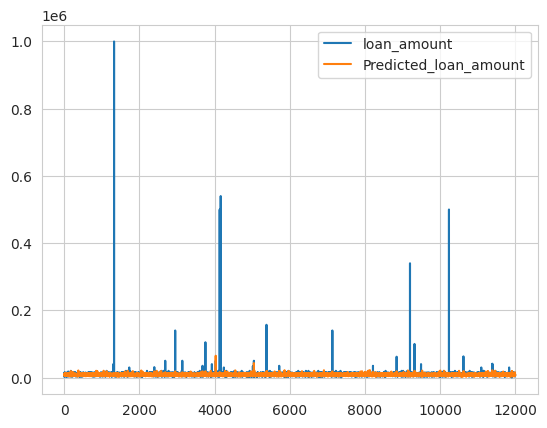

In [151]:
df_row_merged_kdd[['loan_amount','Predicted_loan_amount']].plot()

In [153]:
y_test3=pd.DataFrame(y_test1,columns=list({"loan_amount"}))

In [154]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test3, regression_kdd_prediction))
print('MSE:', metrics.mean_squared_error(y_test3, regression_kdd_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, regression_kdd_prediction)))

MAE: 2301.38978581374
MSE: 166813299.73213723
RMSE: 12915.622313002856


In [155]:
#df_row_merged_randomforest.head()
df_row_merged_kdd['error_rate']=(abs(df_row_merged_kdd['loan_amount']-df_row_merged_kdd['Predicted_loan_amount'])/df_row_merged_kdd['loan_amount'])*100

In [156]:
#mean error rate
linear_mean_errorkdd=df_row_merged_kdd.error_rate.mean()
#calculating accuracy
mean_accuracykdd=100-linear_mean_errorkdd
mean_accuracykdd

71.33307463847026

# Decision Tree

In [158]:
dtree_kdd=DecisionTreeRegressor(criterion='squared_error')
dtree_kdd.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [159]:
dtreePrediction_kdd=dtree_kdd.predict(X_test1)

In [160]:
dtreePrediction_data_kdd=pd.DataFrame(dtreePrediction_kdd,columns=list({"Predicted_loan_amount"}))
dtreePrediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,1000.0
4,10000.0


In [161]:
df_row_merged_dtree_kdd = pd.concat([dtreePrediction_data,y_test2],axis=1)
df_row_merged_dtree_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3000.0,2000.0
4,10000.0,10000.0
5,5000.0,5000.0
6,8000.0,15000.0
7,7500.0,7500.0
8,12000.0,12000.0
9,8000.0,8000.0


In [162]:
y_test2.head()

,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [163]:
print('MAE:', metrics.mean_absolute_error(y_test3, dtreePrediction_kdd))
print('MSE:', metrics.mean_squared_error(y_test3, dtreePrediction_kdd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, dtreePrediction_kdd)))

MAE: 1463.2333333333333
MSE: 311783978.3333333
RMSE: 17657.40576453215


In [164]:
#df_row_merged_randomforest.head()
df_row_merged_dtree_kdd['error_rate']=(abs(df_row_merged_dtree_kdd['loan_amount']-df_row_merged_dtree_kdd['Predicted_loan_amount'])/df_row_merged_dtree_kdd['loan_amount'])*100

In [165]:
#mean error rate
dt_mean_error_kdd=df_row_merged_dtree_kdd.error_rate.mean()
#calculating accuracy
dt_mean_accuracy_kdd=100-dt_mean_error_kdd
dt_mean_accuracy_kdd

85.78682463557527

# RandomForest

In [166]:
randomforest_kdd=RandomForestRegressor()
randomforest_kdd.fit(X_train1,y_train1)

<ipython-input-166-d37ab10970fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_kdd.fit(X_train1,y_train1)


RandomForestRegressor()

In [167]:
randomforest_prediction_kdd=randomforest_kdd.predict(X_test1)

In [169]:
randomforest_prediction_data_kdd=pd.DataFrame(randomforest_prediction_kdd,columns=list({"Predicted_loan_amount"}))
randomforest_prediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3855.0
4,9940.0


In [170]:
df_row_merged_randomforest_kdd = pd.concat([randomforest_prediction_data_kdd,y_test2],axis=1)
df_row_merged_randomforest_kdd.head(10)

,Predicted_loan_amount,loan_amount
0,5000.0,5000.0
1,3000.0,3000.0
2,5000.0,5000.0
3,3855.0,2000.0
4,9940.0,10000.0
5,6250.0,5000.0
6,10780.0,15000.0
7,5925.0,7500.0
8,10560.0,12000.0
9,8030.0,8000.0


In [171]:
print('MAE:', metrics.mean_absolute_error(y_test3, randomforest_prediction_data_kdd))
print('MSE:', metrics.mean_squared_error(y_test3, randomforest_prediction_data_kdd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, randomforest_prediction_data_kdd)))

MAE: 1302.7281666666668
MSE: 180837373.757
RMSE: 13447.578732136131


In [172]:
#df_row_merged_randomforest.head()
df_row_merged_randomforest_kdd['error_rate']=(abs(df_row_merged_randomforest_kdd['loan_amount']-df_row_merged_randomforest_kdd['Predicted_loan_amount'])/df_row_merged_randomforest_kdd['loan_amount'])*100

In [173]:
#mean error rate
rf_mean_error_kdd=df_row_merged_randomforest_kdd.error_rate.mean()

In [174]:
#calculating accuracy
rf_accuracy_kdd=100-rf_mean_error_kdd
rf_accuracy_kdd

86.49031124474278

In [175]:
y_test.head()

,loan_amount
12837,5000.0
10914,3000.0
4214,5000.0
8198,2000.0
29127,10000.0


In [176]:
randomforest_prediction_data_kdd.head()

,Predicted_loan_amount
0,5000.0
1,3000.0
2,5000.0
3,3855.0
4,9940.0
